# Elements for Technical Analysis using Python

**Abstract** Technical Analysis is useful for analyzing the behavior of securities based on different plots with the purpose of determining the upward or downward trends. In the present chapter the discussion will center on returns, volumes, candlestick charts, line charts, simple moving average, MACD, RSI and other technical analysis tools.

**Keywords** Central limit theorem · Returns · Plots · Statistical measures


In the last chapter, the retrieving of data was explored through the process of using an API or an Excel file. Once the data is on the Jupyter Notebook the next step is to proceed with analyzing the information.

The first step is to understand how to display data in Python by using different methods that it provides.

## The Linear Plot with one stock price (max & min values and the range)

The first plot analyzed in the book is the linear plot. In finance, the linear plot is useful to understand the trend of the data that is being used. The linear plot is an excellent visualization tool, although it only demonstrates how the variable has behaved. In the case of using a stock price, the linear plot will show how one of the characteristics of the variable have behaved through a period of time. An example is as follows:

• Importing libraries


In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,1,1)

Tesla = yf.download('TSLA', start, end)

[*********************100%%**********************]  1 of 1 completed


Once the variable is created, the plt.plot function is going to be used to create the variable. 

The matplotlib.pyplot also has the possibility of creating a label for the x-axis, a label for the y-axis, and the title for the plot.

To do this, the easiest way is to create a dummy variable by using the underscore ( _ ). The underscore allows us to add features to a plot without altering the plot. For example (Fig. 1):

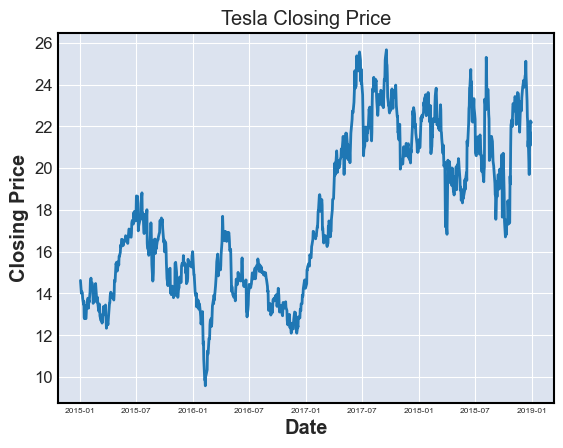

In [16]:
_=plt.plot(Tesla['Close'])
_=plt.xlabel('Date')
_=plt.xticks(fontsize=6)
_=plt.ylabel('Closing Price')
_=plt.title('Tesla Closing Price')

There is another way that the linear plot can be elaborated and according to the author it is easier to work with the problem of the plot above that is how the Date is shown. The recommended way to build a linear plot is as follows (Fig. 2):

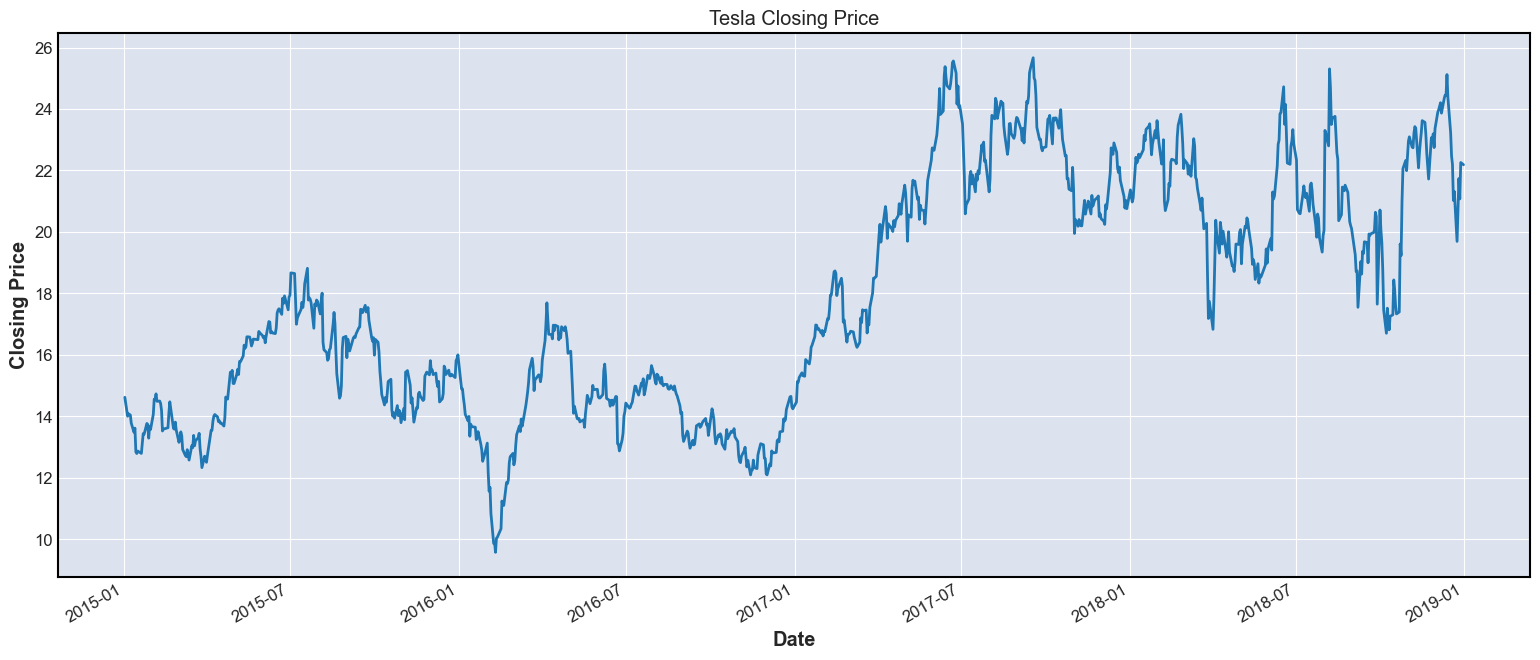

In [17]:
Tesla['Close'].plot(label='Tesla', figsize=(19,8), title='Tesla Closing Price')
_=plt.xlabel('Date')
_=plt.xticks(fontsize=12)
_=plt.ylabel('Closing Price')
_=plt.title('Tesla Closing Price')

The above chart uses figsize used the width as the first number and the height in inches. The plt.xlabel and plt.ylabel are used to add the labels to the x and y-axis. These are attributes that are helpful for creating a clean-looking linear plot.

When analyzing the data, the lowest closing price seems to be between January 2016 and July 2017. 

To find out when the price was the lowest, argmin can be used to return the minimum value.

In [18]:
print(Tesla['Close'].argmin())
print(Tesla['Close'].min())
print(Tesla['Close'].argmax())
print(Tesla['Close'].max())

278
9.57800006866455
682
25.666667938232422


With the information used by max and by min, we can obtain the range. The range is important. It tells us the difference between the highest and the lowest values. The range can be obtained by the difference between max and min as follows:


In [19]:
print(Tesla['Close'].max() - Tesla['Close'].min())

16.08866786956787


## When to use Linear Plots in Finance

Linear plots or line graphs are very useful when analyzing the performance of a stock based on its price. Line plots are one of the most useful resources when representing data such as securities because it allows a comparison between two or more securities (Halton 2019).

The linear plot gives the possibility of visualizing the security over a specific period of time, with a reduction in noise based on that they are elaborated using the closing price (Chen, Line Chart 2019). The use of the closing price is based on the fact that it is the last price that the security has traded at the end of the day in the market.

Using closing prices for security analysis is useful because there is no alteration in the price once it is closed and it allows a more efficient analysis. Considering the highest prices of the day, the lowest prices of the day, the opening price (first price of the day) and the closing price of the day, the last one is the more commonly used by analysts (Kevin 2015).

An example of two or more stocks is extremely useful for highlighting the possibility of analysis.

### The Linear Plot with two or more stock price

• Importing libraries


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


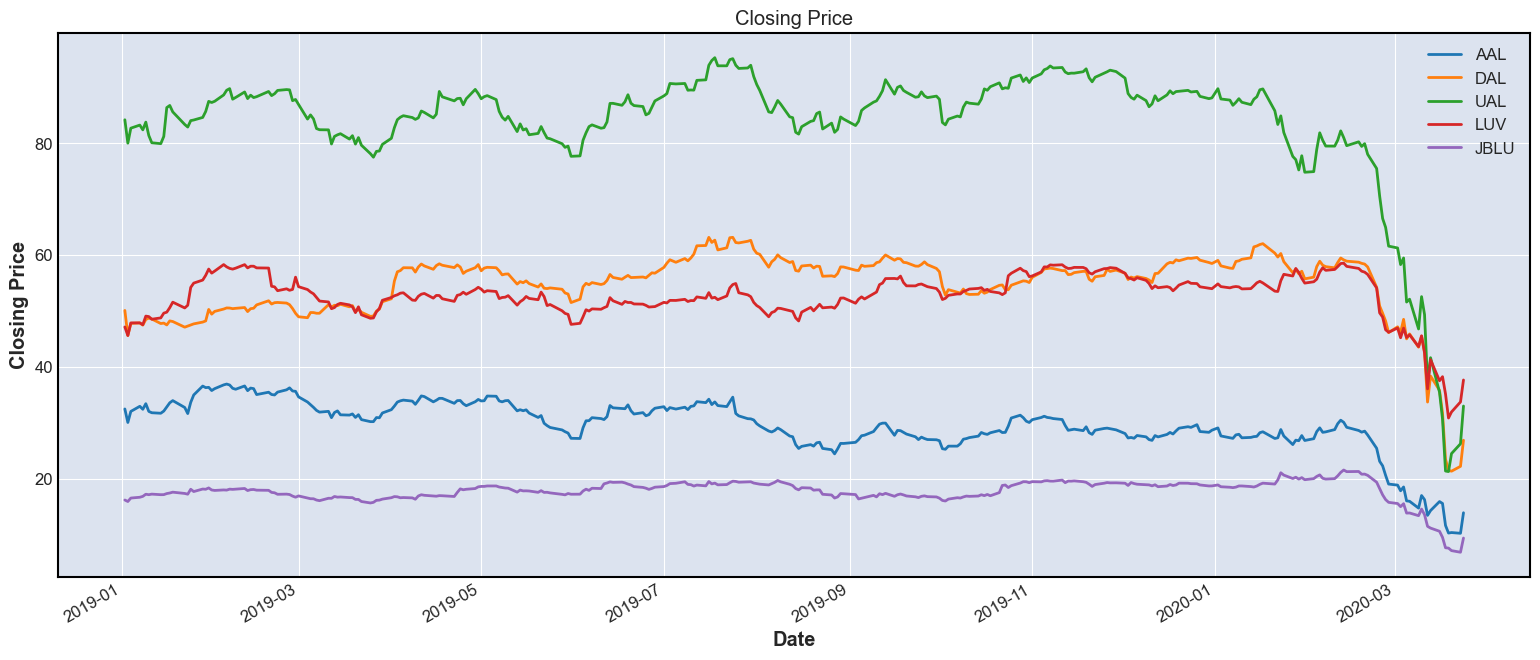

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web
%matplotlib inline

start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,3,25)

American_Airlines = yf.download('AAL', start, end)
Delta_Airlines = yf.download('DAL', start, end)
United_Airlines = yf.download('UAL', start, end)
Southwest_Airlines = yf.download('LUV', start, end)
JetBlu_Airlines = yf.download('JBLU', start, end)

American_Airlines['Close'].plot(label='AAL', figsize=(19,8), title='Closing Price')
Delta_Airlines['Close'].plot(label='DAL')
United_Airlines['Close'].plot(label='UAL')
Southwest_Airlines['Close'].plot(label='LUV')
JetBlu_Airlines['Close'].plot(label='JBLU')
_=plt.xlabel('Date')
_=plt.ylabel('Closing Price')
plt.legend()


One of the main differences with the first linear plot is the use of the command plt.legend(). The command is useful when there are different variables and the user wants to know which line is related to each security. There are different means of creating a legend, considering the necessity of the user.

## Linear plot with volume

The linear plot is not only useful for security prices but it can be also used for identifying trading volume. The trading volume, better known in finance as volume, is the number of contracts or shares that are traded during a period of time (Hayes, Volume Definition 2018). Each transaction in the market is quantified by volume, making it one of the most useful measures of technical analysis. The analysis of the volume has to be done by comparison with the price of the security. If a higher price is also followed by a higher volume, the rising of the price is significant.

It is useful to identify if there is a momentum, which can confirm a trend, or if there is low activity in the market. The example is a continuity of the Tesla line plot. The variable Tesla that was created has five categories (1) open, (2) high, (3) low, (4) Close, (5) Adjusted Close and
(6) Volume.

**• Creating a Volume Plot (Fig. 5)**



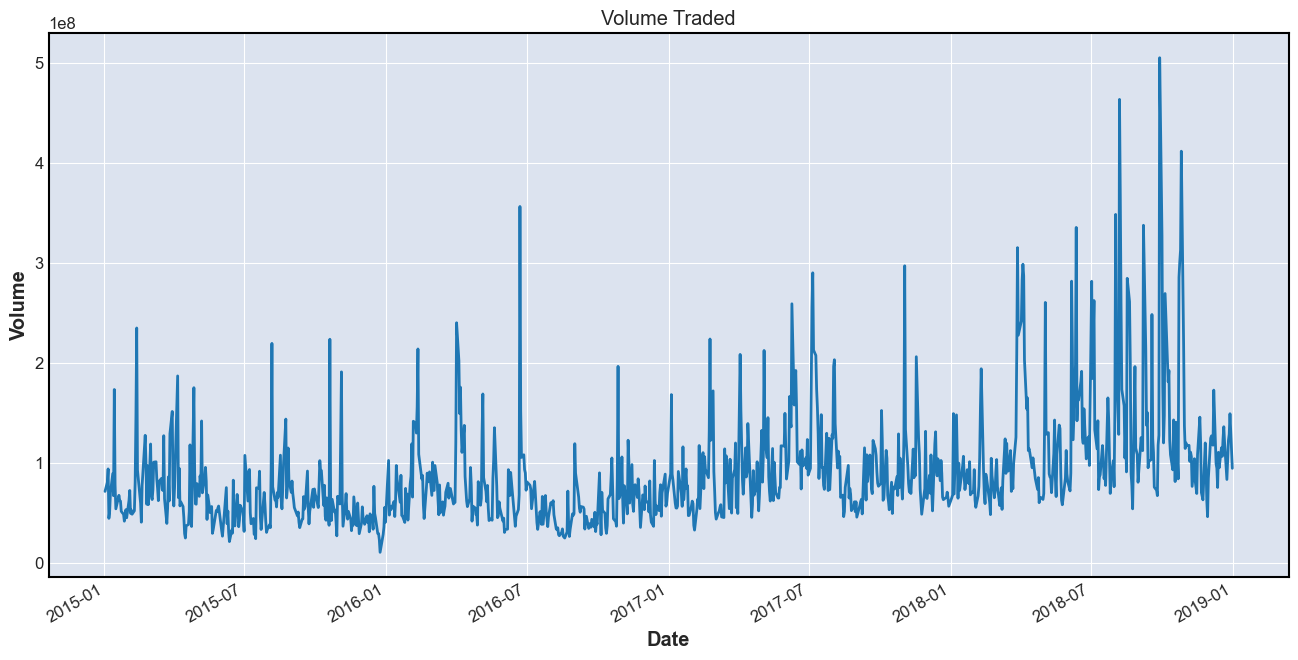

In [21]:
Tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
_=plt.xlabel('Date')
_=plt.ylabel('Volume')


When compared, the volume seems to have a movement similar to the closing price of the stock market, assuring that the move is significant.

When the price has been higher there has been more movement in the stocks concerning Tesla.

## Volume of Trade

One of the most interesting aspects when analyzing volume is to multiply it by the security price, giving as a result the volume of trade during a specific period in terms of money invested. The total money traded is useful to know the quantity of investment in a single day or period, which is useful when analyzing if the market is selling or buying specific security, or to understand the monetary impact of trade. The equation is rather simple:

Equation 1: Total Money Traded

Total Money Trade = Volume × Security Price

**• Obtaining Total Money Traded**


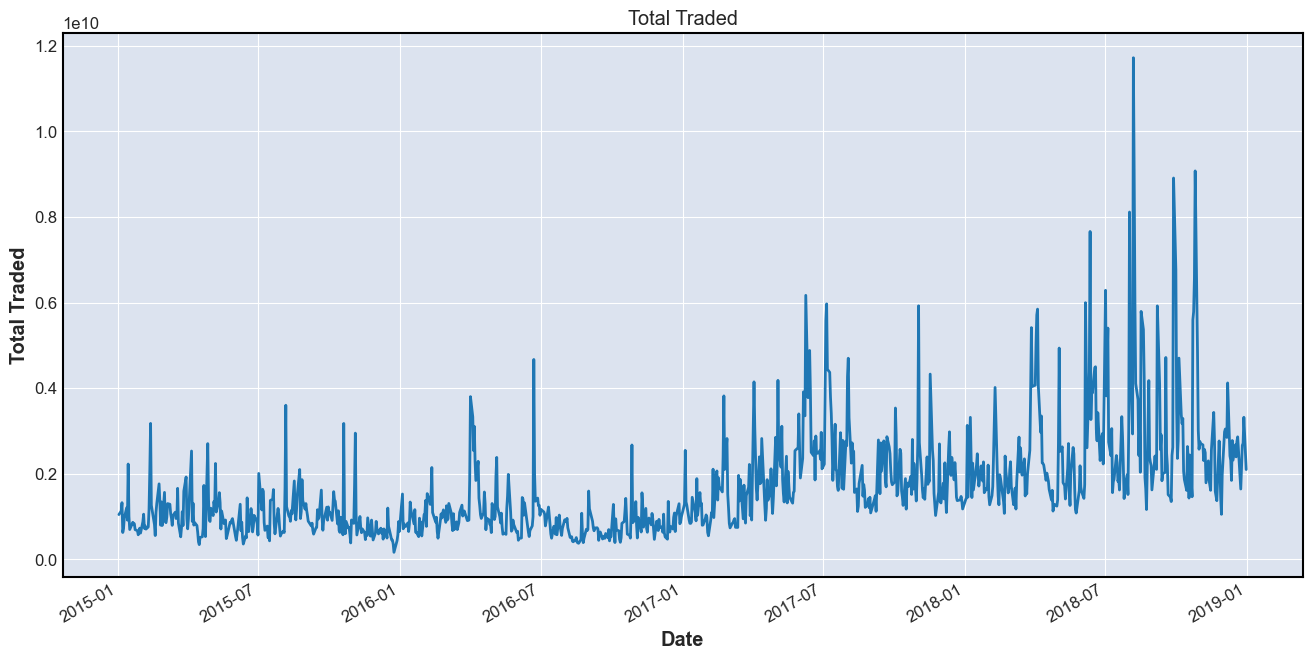

In [22]:
Tesla_total_traded = Tesla['Close'] * Tesla['Volume']
Tesla_total_traded.plot(label='Tesla', figsize=(16,8), title='Total Traded')
_=plt.xlabel('Date')
_=plt.ylabel('Total Traded')


The Total Money Traded Plot demonstrates a similar tendency to the Volume plot, but it also identifies was higher. Meaning that the Total Traded Plot can be seen as the real growth since it includes the volume of transactions and the current price of the transactions. The Total Traded Plot is better used when compared with other companies.

## Comparison of securities with volume plots and closing prices

Comparing volume between securities is vital for financial analysis, basically because it allows the trader to understand trading confirmation, exhaust moves and volume, bullish signs to name a few (Mitchell, How to Use Volume to Improve Your Trading 2020).

To create a plot comparing volumes between securities, the process is as follows:

• Importing libraries

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


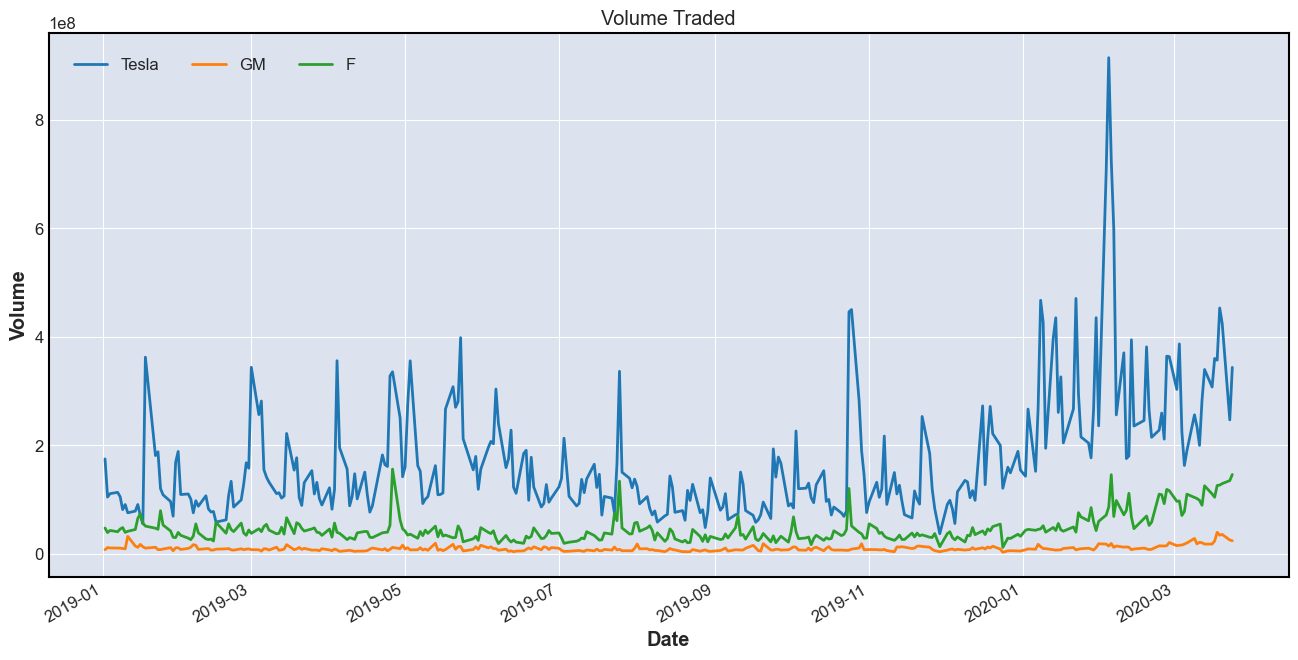

In [23]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,3,25)

Tesla = yf.download('TSLA', start, end)
General_Motors = yf.download('GM', start, end)
Ford = yf.download('F', start, end)

Tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
General_Motors['Volume'].plot(label='GM')
Ford['Volume'].plot(label='F')

_=plt.xlabel('Date')
_=plt.ylabel('Volume')
plt.legend(fancybox=True, framealpha=1, shadow=False, borderpad=1, loc='upper left', ncol=3)



As a conclusion of the graph it can be observed that the volume of Ford demonstrates that it has been traded considerably more than Tesla and General Motors. The comparison could be clearer when compared to the price (Fig. 8).

When comparing the closing price where Ford and General Motors basically have behaved as stable, the volume of Ford has been exceedingly variable. Given that Tesla is reasonably higher than Ford, the comparison of the present graph does not explain the reason between volume and price (Fig. 9).

During the last five years, Ford´s security has had a bearish pattern where the investors are believing less and less in the security. This belief that the security will fall has caused a downtrend. The downtrend explains the volume in which the investors could see an opportunity on
selling or buying (Fig. 10).

As seen in Fig. 21, the effect of the volume rises, and the effect is a momentaneous rise in the stock price. This effect is important when analyzing trade because the volume confirms the trends (circle in red) but has an important effect on the gains/losses of the investor. The importance of volume is that it can anticipate a price reversal, specifically when with little movement in price there is a strong movement in volume. As a part of technical analysis, it is important to understand this behavior which can be combined with quantitative analysis that will be discussed further in the book.

## Candlestick Charts

The Candlestick charts were created in Japan during the 1700s by Homma whose purpose was to analyze if there was a relation between supply and demand of rice (Mitchell 2019). It is extremely useful for analyzing emotional trading and actually is one of the most useful charts in technical analysis.

The Candlestick chart uses the open, high, low and close price in a day. As stated in Fig. 22, the bar can be filled in or be black, although the colors vary into green and red depending on the user. When the body of the candlestick bar is filled, it means that the close was lower than the open, therefore if the body is empty it means that the close was higher than the open (Fig. 11).

To read a Candlestick chart it is important to understand if it is bullish or bearish. These aspects are based on the price direction by analyzing the close and open prices. It is assumed that the Candlesticks are responsible for the focus on the opening price because of the importance of these charts (J. J. Murphy 1999).

To create a Candlestick chart, the mplfinance package will be used.

The reason for using this package is the easiness of creating Candlestick charts and how it adapts to the information accessed by Yahoo API.

The mplfinance package can be accessed at https://github.com/matplotlib/mplfinance#release. There are different aspects considering this package that is going to be highlighted during the process of creating Candlestick Charts.

[*********************100%%**********************]  1 of 1 completed


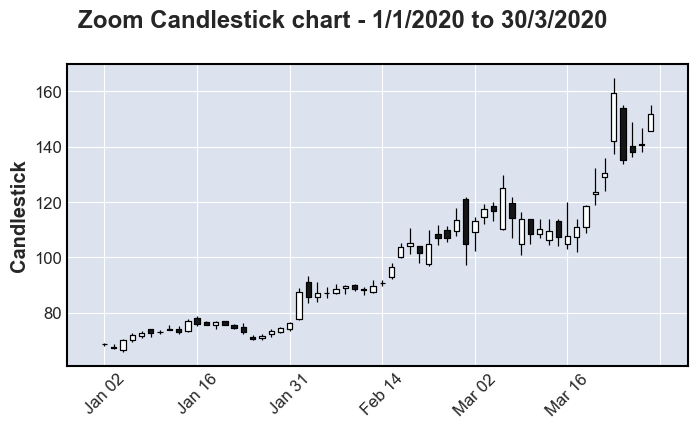

In [24]:
import mplfinance as mfp

start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,3,30)

zoom = yf.download('ZM', start, end)

mfp.plot(zoom, type='candle', title='Zoom Candlestick chart - 1/1/2020 to 30/3/2020', 
         ylabel='Candlestick', figratio=(30,15), figscale=0.75)



The above chart analyzes the trend concerning the security Zoom (ticker ZM) which has seen an important growth given the COVID-19 and the lockdown in various countries. From March 16 until March 30 the candles have grown wider because of its high and low price, which demonstrates high volatility in the security. A bullish pattern can also be seen as well as the difference between closing price and opening price, which leads to black and white candlesticks.

## Candlestick charts and volume

Candlesticks may also benefit from the analysis of volume. The purpose of analyzing candlesticks and volume is based on the fact that the prices are guided by the transactions, as exposed previously.



[*********************100%%**********************]  1 of 1 completed


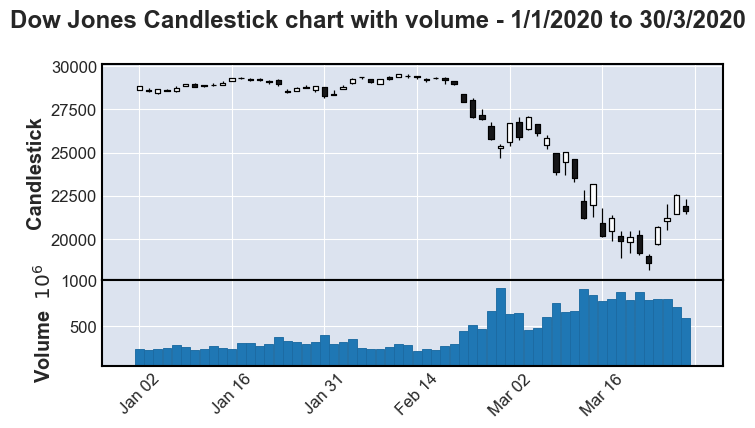

In [25]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,3,30)

Dow_Jones = yf.download('^DJI' , start, end)

mfp.plot(Dow_Jones, type='candle', title= 'Dow Jones Candlestick chart with volume - 1/1/2020 to 30/3/2020',
         ylabel='Candlestick', figratio=(30,15), figscale=0.75, volume=True)


As Fig. 24 demonstrates, there is a bearish pattern in the stock and when analyzed with the volume, the shares traded have been growing since February 14th, 2020, which is when the COVID-19 began to have an impact in Spain and Italy. Also, on March 12 the World Health Organization declared COVID-19 as a pandemic, which surged the volume and lowered considerably the price. Let us remember that according to the Dow Jones Theory, the market discounts everything and this is expressed in the price.


## Customizing Candlesticks Charts and Volume with **kwargs

**Kwargs are extremely useful when working with functions and charts.

In the case of the mplfinance the kwargs can be useful to add the customization of the plots into an only variable. Use kwargs in charts when there are many variables rather than using an approach of describing each variable, this is helpful for those reading the notebook (Mastromatteo 2020).

**- Creating a **kwarg**

For creating a **kwarg the process is simple because it is based on a dictionary. To create a kwarg the process is as follows:



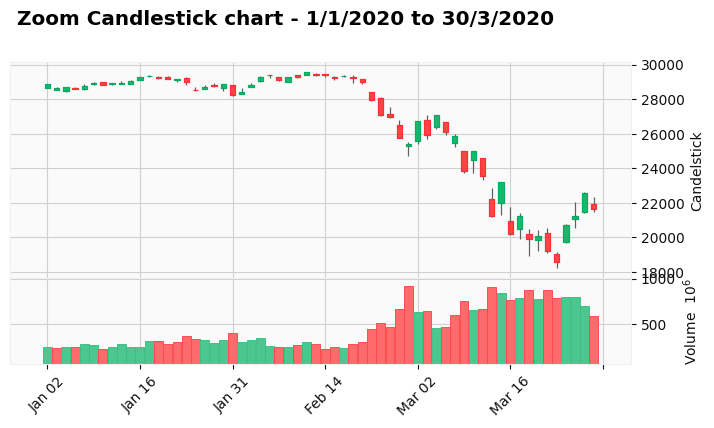

In [26]:
kwargs = dict(type ='candle',
              title = 'Zoom Candlestick chart - 1/1/2020 to 30/3/2020',
              ylabel = 'Candelstick',
              figratio = (30,15),
              figscale = 0.75,
              volume = True)

mfp.plot(Dow_Jones, **kwargs, style='yahoo')

The result of using kwargs is that it creates a dictionary, giving easy access to the user when adapting the chart with the different formats such as 'starandstripes', 'brasil' , 'mike' , 'charles' and 'classic'. The adaptation is userfriendly and it allows for any alteration of the charts.


## OHLC Charts with Volume

The OHCL charts follow the same idea behind the Candlestick charts. Its name is derived from the Open price, High price, Closing price and Lower price. An OHLC chart might be easy for some users to understand when analyzing data, therefore it is included in the present book.

To interpret the OHLC chart, one must understand what each bar means (Fig. 15).

When elaborating an OHLC chart using mplfinance it is a similar process to the creation of the candlestick charts. Volume can also be added as part of the chart and the customization of the chart is the same as the candlestick.


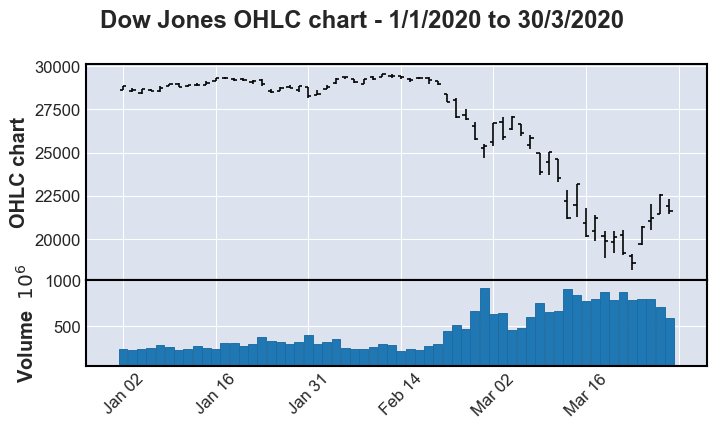

In [27]:
kwargs = dict(title = 'Dow Jones OHLC chart - 1/1/2020 to 30/3/2020',
              ylabel = 'OHLC chart',
              figratio = (30,15),
              figscale = 0.75,
              volume = True)

mfp.plot(Dow_Jones,**kwargs)

As show in Fig. 27 the process and the interpretation are similar to a Candlestick chart. The volume has led to a change in prices and has had an effect on the volatility of the security. The relation between shares traded and the movement in price demonstrates the stated argument.

## Line Charts with Volume

In one of the sections discussed earlier using matplotlib the analysis of volume and a line chart was created by elaborating two charts. Using mplfinace this can be done on the same chart.



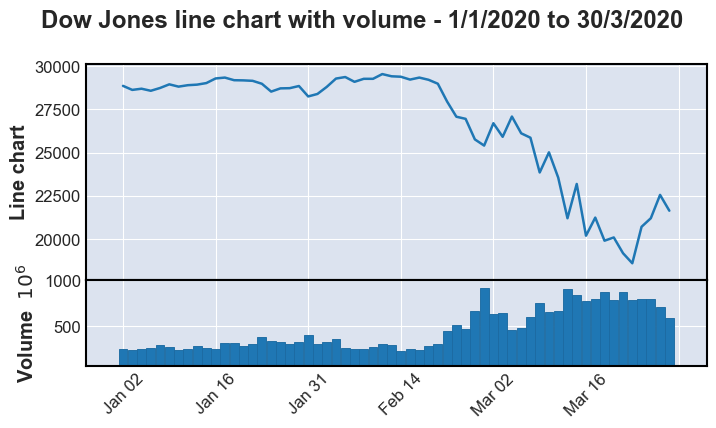

In [28]:
kwargs = dict(title = 'Dow Jones line chart with volume - 1/1/2020 to 30/3/2020',
              ylabel = 'Line chart',
              figratio = (30,15),
              figscale = 0.75,
              volume = True)

mfp.plot(Dow_Jones, **kwargs, type='line')


## Moving Average with matplotlib

The moving average is a technical indicator part of the technical analysis, which means that it is centered on the trends of the stocks based on trading activity. It filters the noise concerning short-term prices and is useful to identify a trend direction (Hayes 2020). The moving average (MA) can be divided into simple moving average (SMA) or exponential moving average (EMA). Both of the indicators are useful for elaborating the Moving Average Convergence Divergence (MACD) which is functional for determining the momentum of a stock.

For creating an SMA, the companies that will be used are Amazon, Walmart and Target. To calculate an SMA the first step is to determine how many periods will be used as the average. The most common periods are 20, 50, 100 and 200 days (Milton 2020). This depends on the data that is available and the purpose of the analysis. If there has been a strong movement in the security market, it may be useful to use the 50-day period. If there has not been any change in the companies during of comparison it may be useful to use the 100- or 200-day period.


In [29]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,1,1)

Amazon = yf.download('AMZN', start, end)
Walmart = yf.download('WMT', start, end)
Target = yf.download('TGT', start, end)

Amazon['MA50'] = Amazon['Close'].rolling(50).mean()
Walmart['MA50'] = Walmart['Close'].rolling(50).mean()
Target['MA50'] = Target['Close'].rolling(50).mean()

Amazon['MA100'] = Amazon['Close'].rolling(100).mean()
Walmart['MA100'] = Walmart['Close'].rolling(100).mean()
Target['MA100'] = Target['Close'].rolling(100).mean()

Amazon['MA200'] = Amazon['Close'].rolling(200).mean()
Walmart['MA200'] = Walmart['Close'].rolling(200).mean()
Target['MA200'] = Target['Close'].rolling(200).mean()





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


For the above example the rolling DataFrame from pandas was used.

By using rolling the window of days can be defined (in this case 50) and by using the rolling with the mean, the result is the average of the 1st day to the 50th day and then the average of 2nd day to the 51st day and so on.

Once the three companies have in the DataFrame the MA50 column, then they can be plotted individually to analyze the momentum of the stocks.


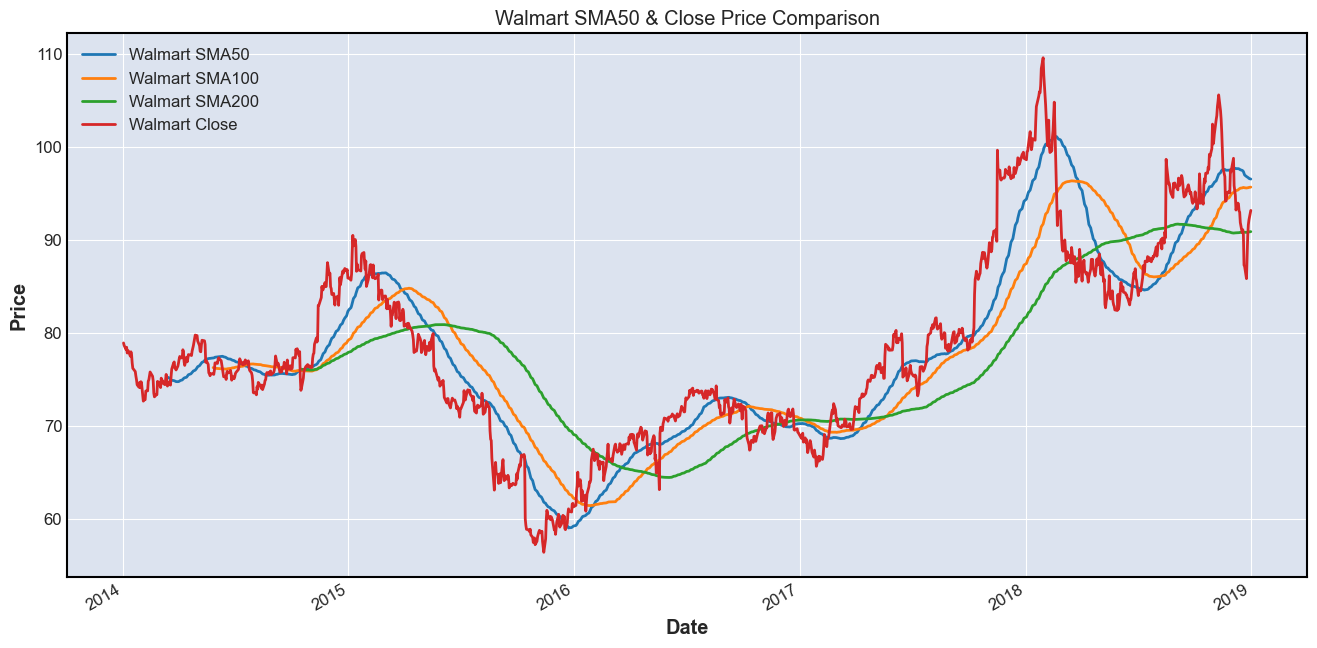

In [30]:
Walmart['MA50'].plot(label = 'Walmart SMA50', figsize=(16,8))
Walmart['MA100'].plot(label = 'Walmart SMA100')
Walmart['MA200'].plot(label = 'Walmart SMA200')
Walmart['Close'].plot(label = 'Walmart Close')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Walmart SMA50 & Close Price Comparison')
plt.legend()

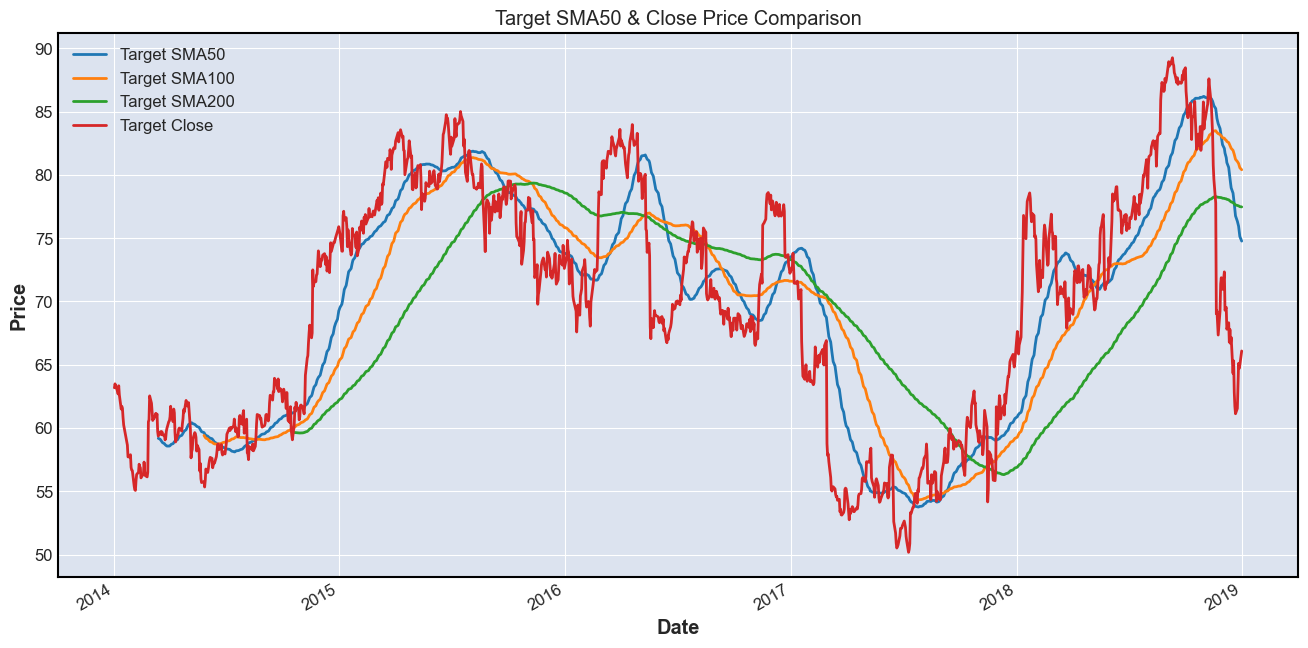

In [31]:
Target['MA50'].plot(label = 'Target SMA50', figsize=(16,8))
Target['MA100'].plot(label = 'Target SMA100')
Target['MA200'].plot(label = 'Target SMA200')
Target['Close'].plot(label = 'Target Close')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Target SMA50 & Close Price Comparison')
plt.legend()

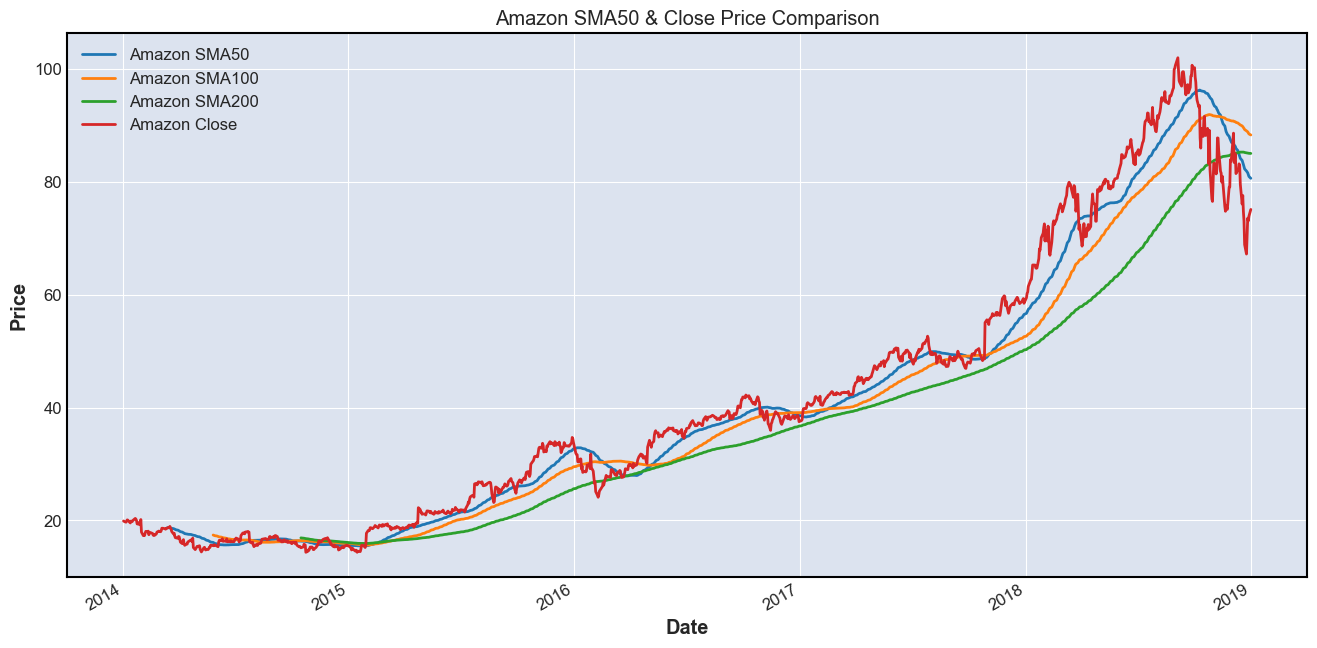

In [32]:
Amazon['MA50'].plot(label = 'Amazon SMA50', figsize=(16,8))
Amazon['MA100'].plot(label = 'Amazon SMA100')
Amazon['MA200'].plot(label = 'Amazon SMA200')
Amazon['Close'].plot(label = 'Amazon Close')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Amazon SMA50 & Close Price Comparison')
plt.legend()

As seen on the plots, the momentum of Target and Amazon in the selected dates, the SMA50 shows a bigger fall than the SMA 200. It is important to notice that the three SMA predict a fall during the selected dates. This could be seen as an indication that the security could fall. In the case of Walmart, it is different since SMA50 and the SMA200 is that the SMA200 demonstrates a stability in the stock.

## Moving Average with mplfinance

Using the mplfinance for creating SMA is far more user-friendly than matplotlib. The only inconvenience with the SMA in mplfinance is that at the time this book is published, there are no options for adding legends.

Other than the mentioned aspect, the process adds the characteristic mav for moving average in which the number represents the different periods.


[*********************100%%**********************]  1 of 1 completed


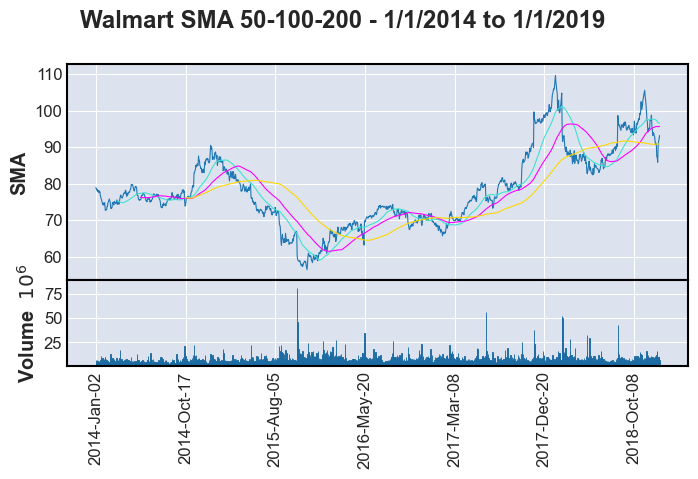

In [33]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,1,1)

Walmart = yf.download('WMT', start, end)

kwargs = dict(title='Walmart SMA 50-100-200 - 1/1/2014 to 1/1/2019',
              ylabel='SMA',
              figratio=(30, 15),
              figscale=0.75,
              volume=True,
              xrotation=90,  # Rotar las etiquetas del eje X
              )

mfp.plot(Walmart, **kwargs, mav=(50,100,200), type='line')



The SMA is equivalent to the one elaborated with matplotlib in Fig. 19: Simple moving average of Walmart. The only problem are the legends, but the process is far simpler. For a quick analysis it is recommended to use the mplfinance as the main resource.

The Exponential Moving Average (EMA)

The exponential moving average (EMA) has the same background as the moving average but it gives a specific weight to recent data points, which is the most important difference. The EMA is also a technical indicator that is useful to identify trends in the security market. The 50, 100 and 200 days are also used in the EMA as conventionalism (Hayes 2020).

When programming the EMA the Pandas DataFrame ewm for exponential weighted is combined with the mean. This is an important aspect since the EMA has an exponential weight that will determine the effect on the curves and how it relates to the market. The process is done as follows:


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


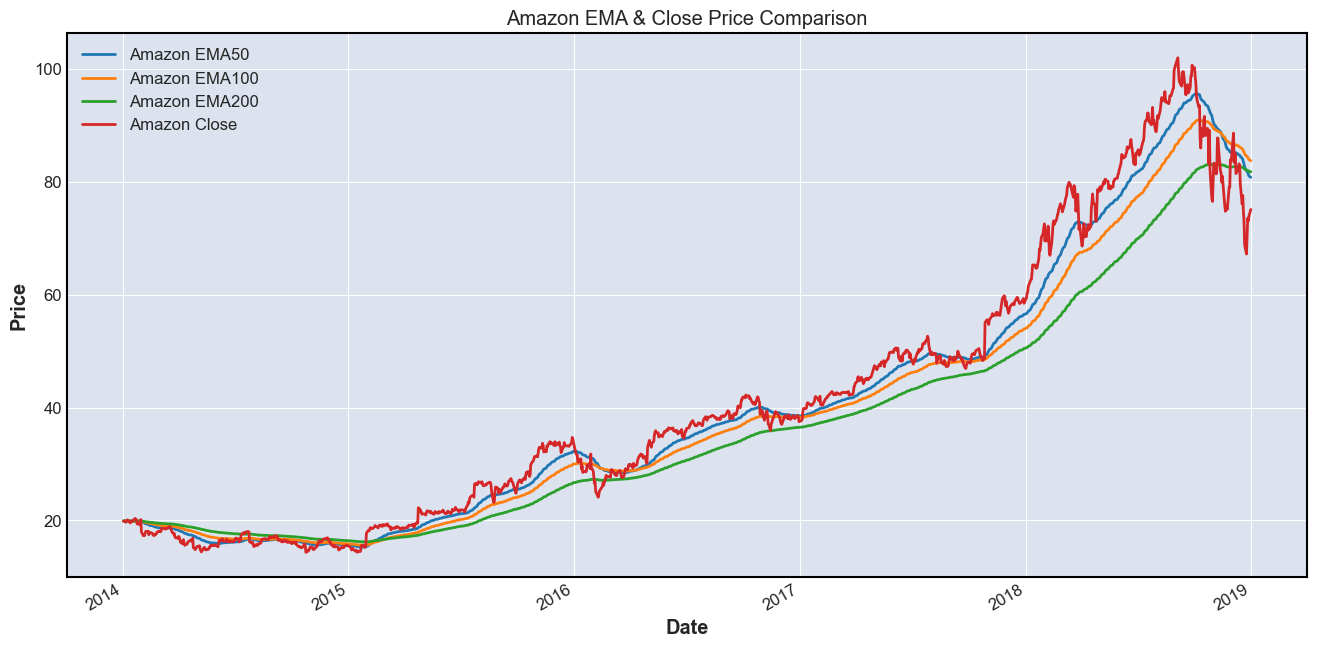

In [34]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,1,1)

Amazon = yf.download('AMZN', start, end)
Walmart = yf.download('WMT', start, end)
Target = yf.download('TGT', start, end)

Amazon['EMA50'] = Amazon['Close'].ewm(span = 50, adjust = False).mean()
Amazon['EMA100'] = Amazon['Close'].ewm(span = 100, adjust = False).mean()
Amazon['EMA200'] = Amazon['Close'].ewm(span = 200, adjust = False).mean()

Walmart['EMA50'] = Walmart['Close'].ewm(span = 50, adjust = False).mean()
Walmart['EMA100'] = Walmart['Close'].ewm(span = 100, adjust = False).mean()
Walmart['EMA200'] = Walmart['Close'].ewm(span = 200, adjust = False).mean()

Target['EMA50'] = Target['Close'].ewm(span = 50, adjust = False).mean()
Target['EMA100'] = Target['Close'].ewm(span = 100, adjust = False).mean()
Target['EMA200'] = Target['Close'].ewm(span = 200, adjust = False).mean()

Amazon['EMA50'].plot(label = 'Amazon EMA50', figsize=(16,8))
Amazon['EMA100'].plot(label = 'Amazon EMA100')
Amazon['EMA200'].plot(label = 'Amazon EMA200')
Amazon['Close'].plot(label = 'Amazon Close')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Amazon EMA & Close Price Comparison')
plt.legend()



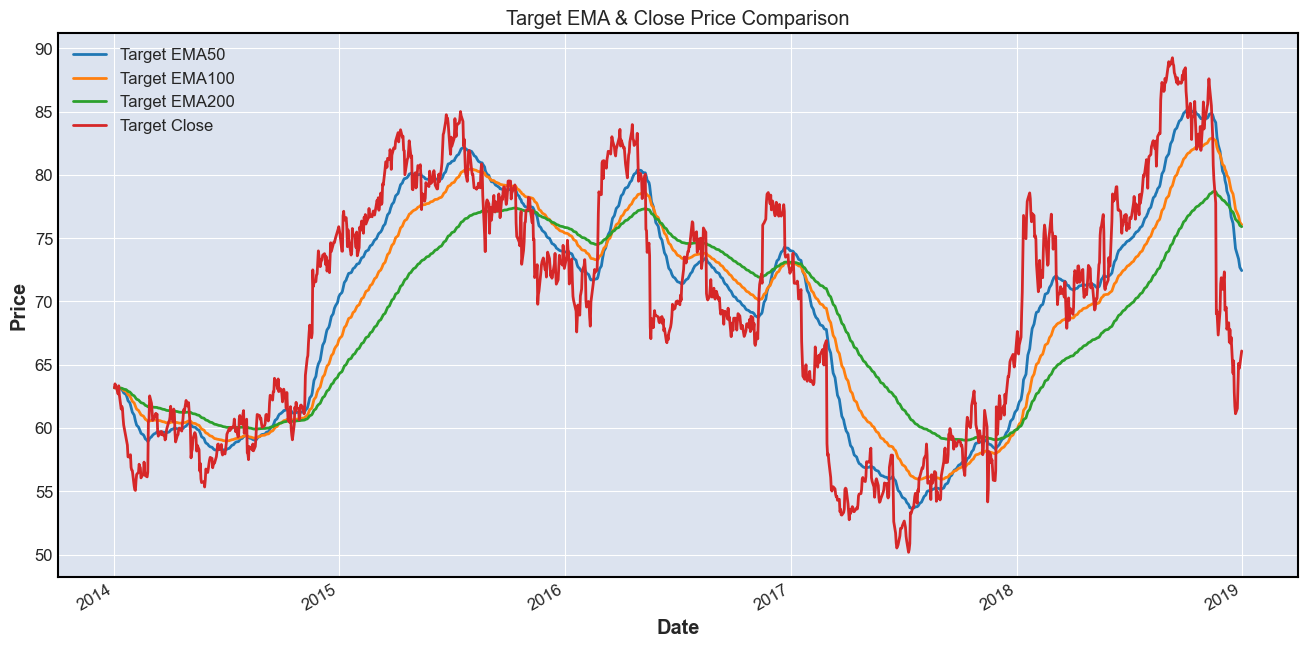

In [35]:
Target['EMA50'].plot(label = 'Target EMA50', figsize=(16,8))
Target['EMA100'].plot(label = 'Target EMA100')
Target['EMA200'].plot(label = 'Target EMA200')
Target['Close'].plot(label = 'Target Close')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Target EMA & Close Price Comparison')
plt.legend()

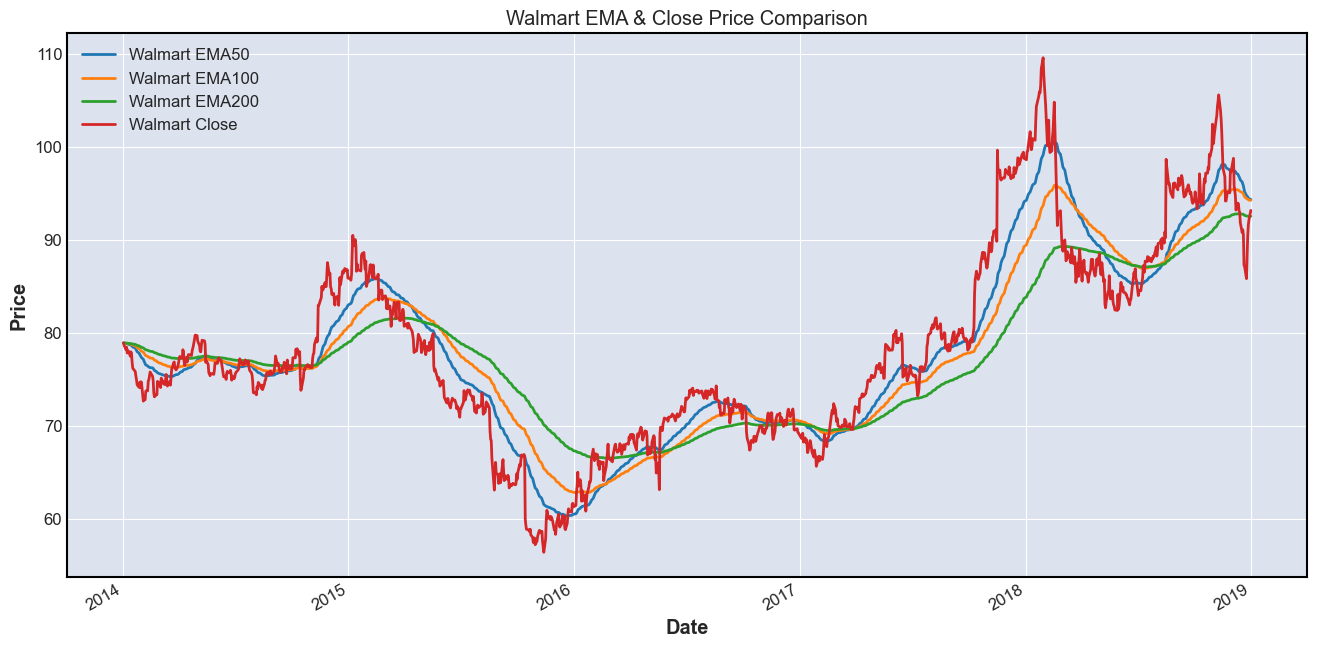

In [36]:
Walmart['EMA50'].plot(label = 'Walmart EMA50', figsize=(16,8))
Walmart['EMA100'].plot(label = 'Walmart EMA100')
Walmart['EMA200'].plot(label = 'Walmart EMA200')
Walmart['Close'].plot(label = 'Walmart Close')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Walmart EMA & Close Price Comparison')
plt.legend()

When compared with the SMA the difference is that the fall of Target and Amazon is not as drastic as in the SMA. This leads us to choose between selecting the EMA strategy by analyzing the current effects on the market or the SMA if the market has seen an important change in the past few weeks and one thinks it should not have a weight in the analysis.

## The Moving Average Convergence Divergence (MACD) with Baseline

The Moving Average Convergence Divergence, better known as MACD, was created by Gerard Appel with the purpose of understanding the market behavior. The MACD is part of technical analysis and one of the most used indicators when trading (Mitchell 2019).

The MACD is composed of three components:

- The MACD line which measures the distance between two moving averages.
- Signal line that identifies price change.
- Histogram that represents the difference between MACD and signal line.

For calculating the MACD it is important to first calculate the Exponential Moving Average (EMA).

For this, it is useful to use the Pandas DataFrame ewm that was used before. The equation to calculate the MACD is the following:

Equation 2: MACD equation with EMA

MACD = EMA for 12 periods − EMA for 26 periods

To input the equation in Python the ewm will be combined with the mean function to obtain the MACD. The span will be set in the first part of the equation in 12 and the second part of the equation in 26. The elaboration in Python is simple and is done as follows:



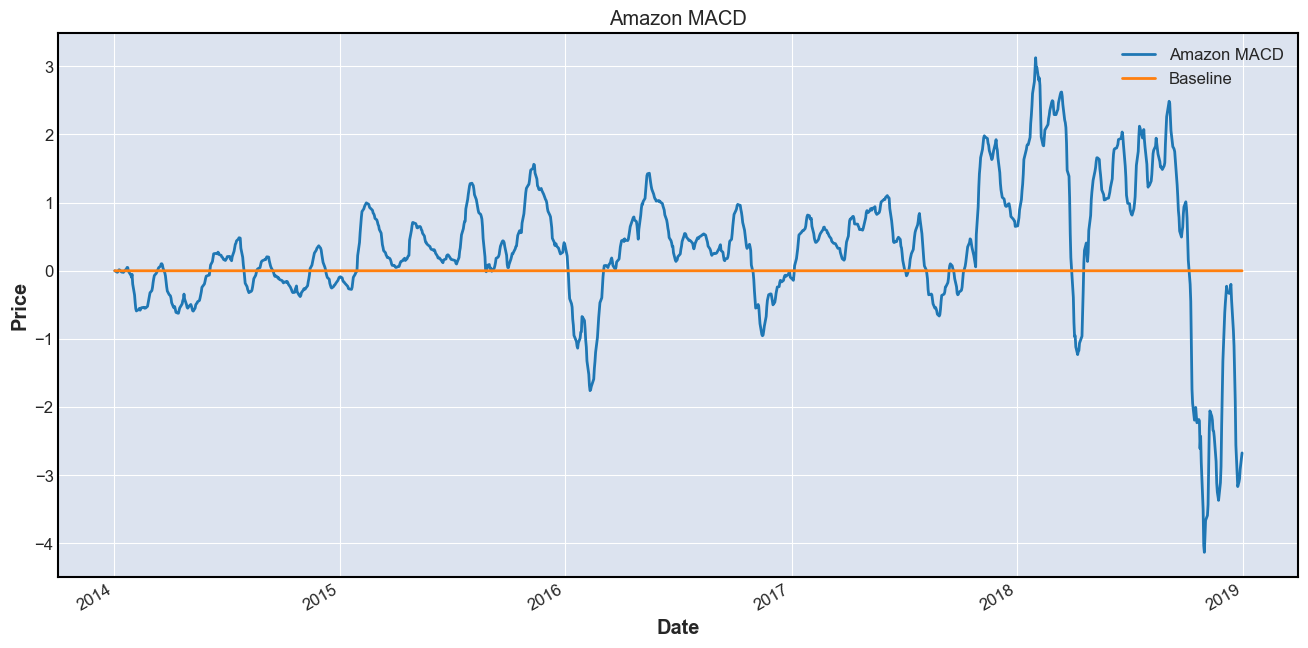

In [37]:
Amazon['MACD']=Amazon['Close'].ewm(span=12, adjust=False).mean()-Amazon['Close'].ewm(span=26, adjust=False).mean()

Walmart['MACD']=Walmart['Close'].ewm(span=12, adjust=False).mean()-Walmart['Close'].ewm(span=26, adjust=False).mean()

Target['MACD']=Target['Close'].ewm(span=12, adjust=False).mean()-Target['Close'].ewm(span=26, adjust=False).mean()

Amazon['baseline']=0
Walmart['baseline']=0
Target['baseline']=0

Amazon['MACD'].plot(label='Amazon MACD', figsize=(16,8))
Amazon['baseline'].plot(label='Baseline')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Amazon MACD')
plt.legend()

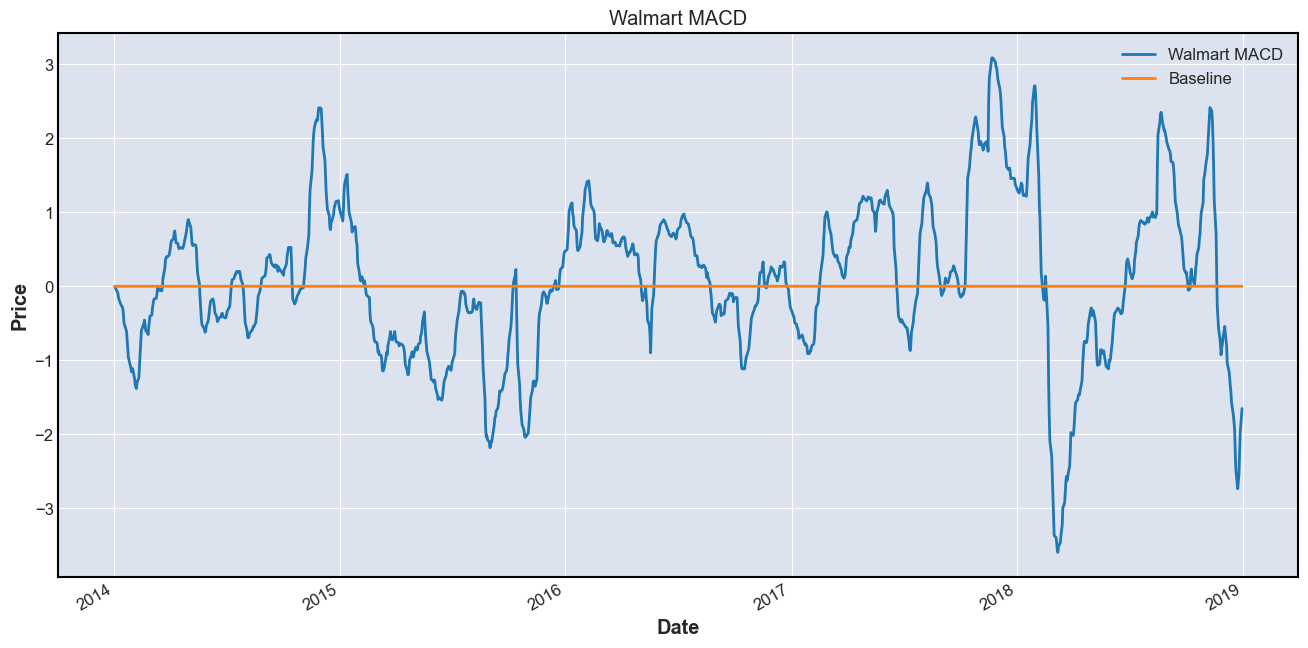

In [38]:
Walmart['MACD'].plot(label='Walmart MACD', figsize=(16,8))
Walmart['baseline'].plot(label='Baseline')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Walmart MACD')
plt.legend()

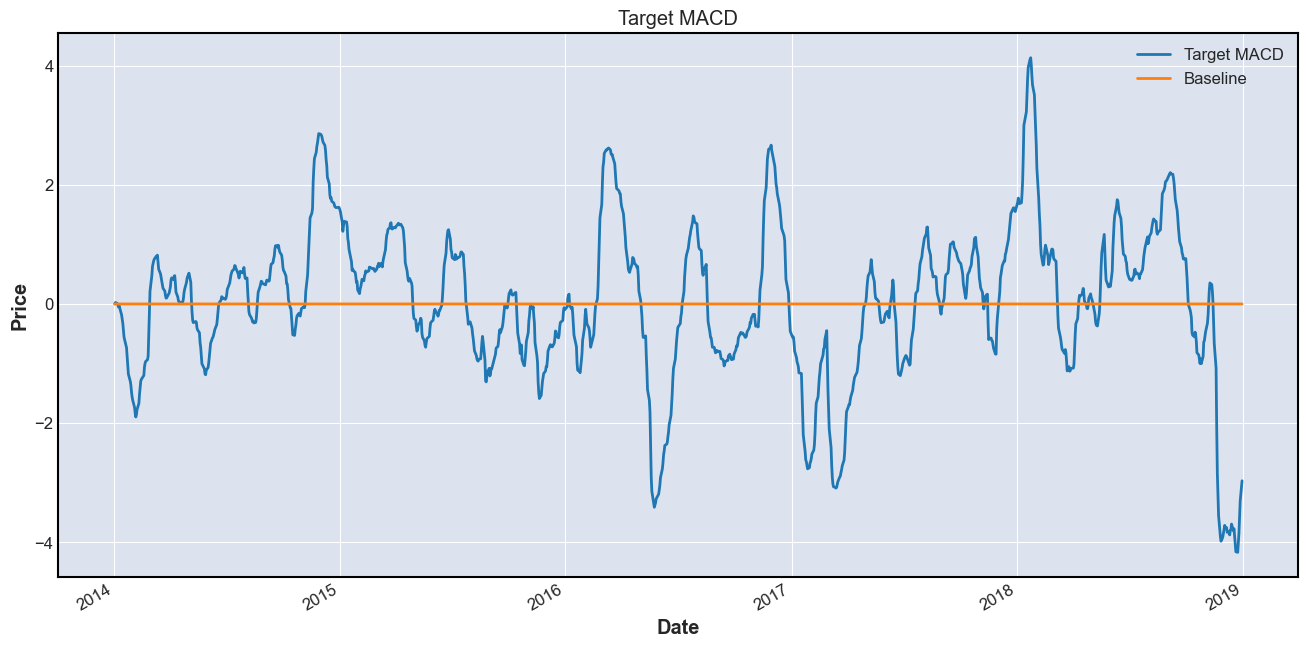

In [39]:
Target['MACD'].plot(label='Target MACD', figsize=(16,8))
Target['baseline'].plot(label='Baseline')
_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('Target MACD')
plt.legend()

The interpretation of the MACD is set on the baseline which is zero.

When the MACD is above the baseline then the stock or market is bullish, if the market is below the zero line then the market is bearish. The MACD is also presented in a histogram but the line graph is a simpler way to illustrate the process.

## The Moving Average Convergence Divergence (MACD) with Signal Line

Using a signal line in the MACD is one of the most important trading items because of its interpretation.
– When the MACD crosses the signal line from below to above the indicator is considered bullish.
– When the MACD crossed the signal line from above to below the indicator is considered bearish (Posey 2019).

The signal line is equivalent to an EMA of nine periods. The signal line will be plotted with the MACD.


[*********************100%%**********************]  1 of 1 completed


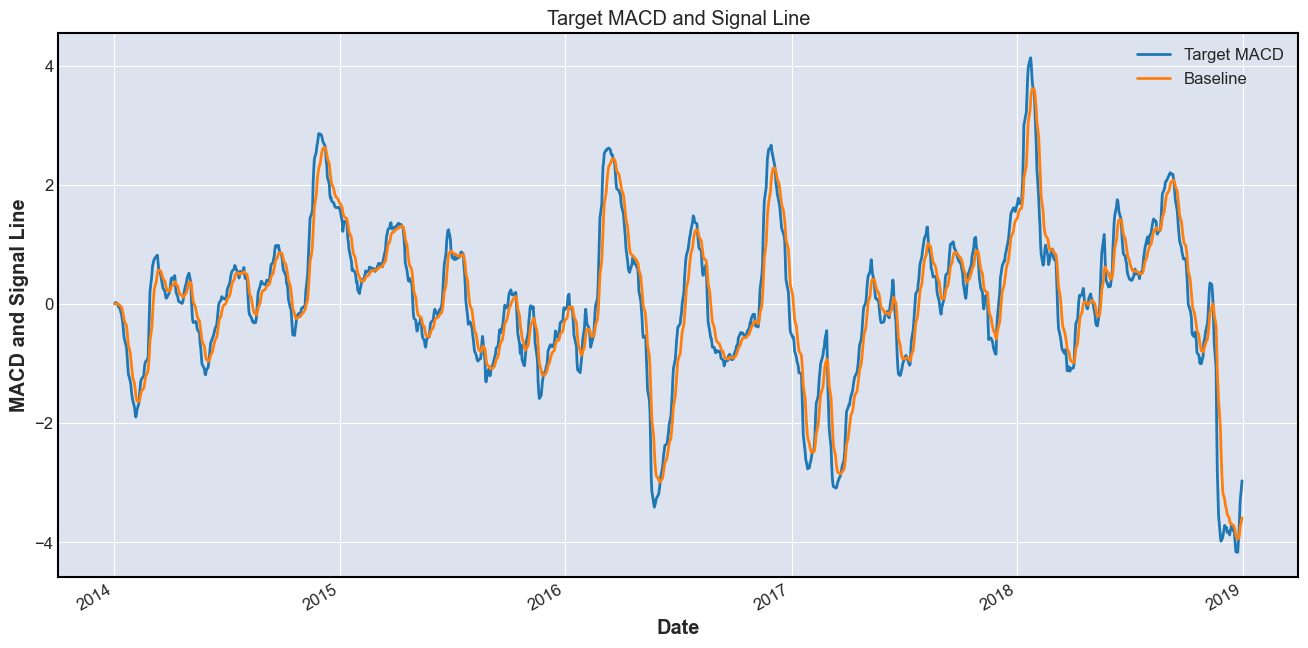

In [40]:
Target=yf.download('TGT', start, end)

ema_12=Target['Close'].ewm(span=12, adjust=False).mean()
ema_16=Target['Close'].ewm(span=26, adjust=False).mean()

macd=ema_12 - ema_16
signal_line=macd.ewm(span=9, adjust=False).mean()

macd.plot(label='Target MACD', figsize=(16,8))
signal_line.plot(label='Baseline')
_=plt.xlabel('Date')
_=plt.ylabel('MACD and Signal Line')
_=plt.title('Target MACD and Signal Line')
plt.legend()

## Bollinger Bands

When John Bollinger created the Bollinger Bands in the 1980s he found a means of joining the quantitative aspect (standard deviation) and technical analysis for decision-making. Bollinger bands combine standard deviation, a measure for volatility, and moving average defining when the security has a contraction or an expansion (Bollinger 2018).

Bollinger Bands are extremely useful when analyzing security because:
– When there is low volatility the bands will be close together. When there is high volatility the bands will be apart. Periods of low volatility are often followed by high volatility. The same is for periods of high volatility followed by low volatility.
– If a price moves beyond the upper barrier the prices are considered overbought. Meaning that the stock is being bought at unjustifiably high prices.
– If a price moves below the upper barrier then the prices are considered oversold. Meaning that the stocks are selling below its true value.

To calculate a Bollinger Band there is a need for a window of days for the average and a number of standard deviations for the higher and lower bands. The number of days conventionally is set to 20 days. For the Bollinger Band the package that will be used is the mplfinance.

[*********************100%%**********************]  1 of 1 completed


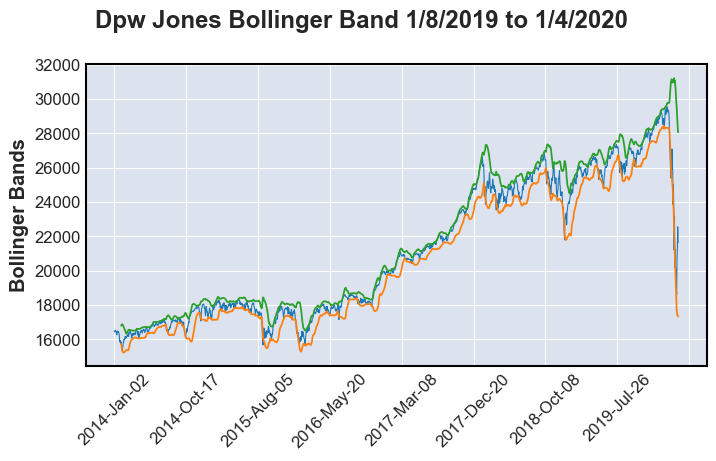

In [41]:
star=datetime.datetime(2018,8,1)
end=datetime.datetime(2020,3,30)

Dow_Jones=yf.download('^DJI', start, end)
windows_of_days=20
number_std=2

rolling_mean=Dow_Jones['Close'].rolling(windows_of_days).mean()
rolling_std=Dow_Jones['Close'].rolling(windows_of_days).std()

Dow_Jones['Rolling Mean']=rolling_mean
Dow_Jones['Bollinger High']=rolling_mean + (rolling_std*number_std)
Dow_Jones['Bollinger Low']=rolling_mean - (rolling_std*number_std)

high_low=Dow_Jones[['Bollinger Low','Bollinger High']]

apd=mfp.make_addplot(high_low)

kwargs=dict(title='Dpw Jones Bollinger Band 1/8/2019 to 1/4/2020',
            ylabel='Bollinger Bands',
            figratio=(30,15),
            figscale=0.75)

mfp.plot(Dow_Jones, addplot=apd, **kwargs, type='line')

As expressed before, there are three breaking points in the lower band during the COVID-19 pandemic crisis, which means that the stocks are oversold. This leads to the argument that because of fear there was dumping or selling securities before they lost value.

## Backtesting strategies for trading

Backtesting has become extremely useful with Python and API data because it allows historical information to be accessed easily, as seen before, and be used nn a prompt manner. Backtesting for trading is important because it offers a strategy for creating returns based on the performance of a stock.

### Parabolic SAR

The parabolic SAR gives and edges to the traders given that it analyzes the movement of the stock. It was created by J. Welles Wilder Jr., which also created the RSI (C. Murphy 2020). The logic behind the parabolic SAR is as follows:

Equation 3: Uptrend and Downtrend SAR Equation

Uptrend Parabolic SAR = Prior SAR + Prior Acceleration Factor ∗ (Prior Extreme Point − Prior SAR)

Downtrend Parabolic SAR = Prior SAR − Prior Acceleration Factor ∗ (Prior SAR − Prior Extreme Point)

There are important aspects when creating a parabolic SAR, for example, the extreme point in the uptrend is the highest price, usually refer as High, and in the Downtrend, it is the low price referred to as Low. The acceleration factor is usually set at 0.02. The acceleration factor affects the SAR when the extreme point is recorded by 0.02. The acceleration factor is modified depending on each trader and its strategy.

When using the TA-Lib library for calculating the parabolic SAR the function SAR will be used to retrieve the information. It will ask for the following:

– Choose the High price for the extreme points in uptrend
– Choose the Low price for the extreme point in downtrend.
– Choose the acceleration factor (as recommended 0.02)
– Choose the maximum for the acceleration factor (recommended 0.02)

The implementation is as follows:

– Import packages including talib




[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-08-01   53.474998   54.507500   51.685001   52.107498   50.421265   
2019-08-02   51.382500   51.607498   50.407501   51.005001   49.354450   
2019-08-05   49.497501   49.662498   48.145000   48.334999   46.770851   
2019-08-06   49.077499   49.517502   48.509998   49.250000   47.656242   
2019-08-07   48.852501   49.889999   48.455002   49.759998   48.149738   
...                ...         ...         ...         ...         ...   
2021-01-25  143.070007  145.089996  136.539993  142.919998  140.439697   
2021-01-26  143.600006  144.300003  141.369995  143.160004  140.675537   
2021-01-27  143.429993  144.300003  140.410004  142.059998  139.594620   
2021-01-28  139.520004  141.990005  136.699997  137.089996  134.710876   
2021-01-29  135.830002  136.740005  130.210007  131.960007  129.669922   

               Volume  PSARl_0.02_0.2

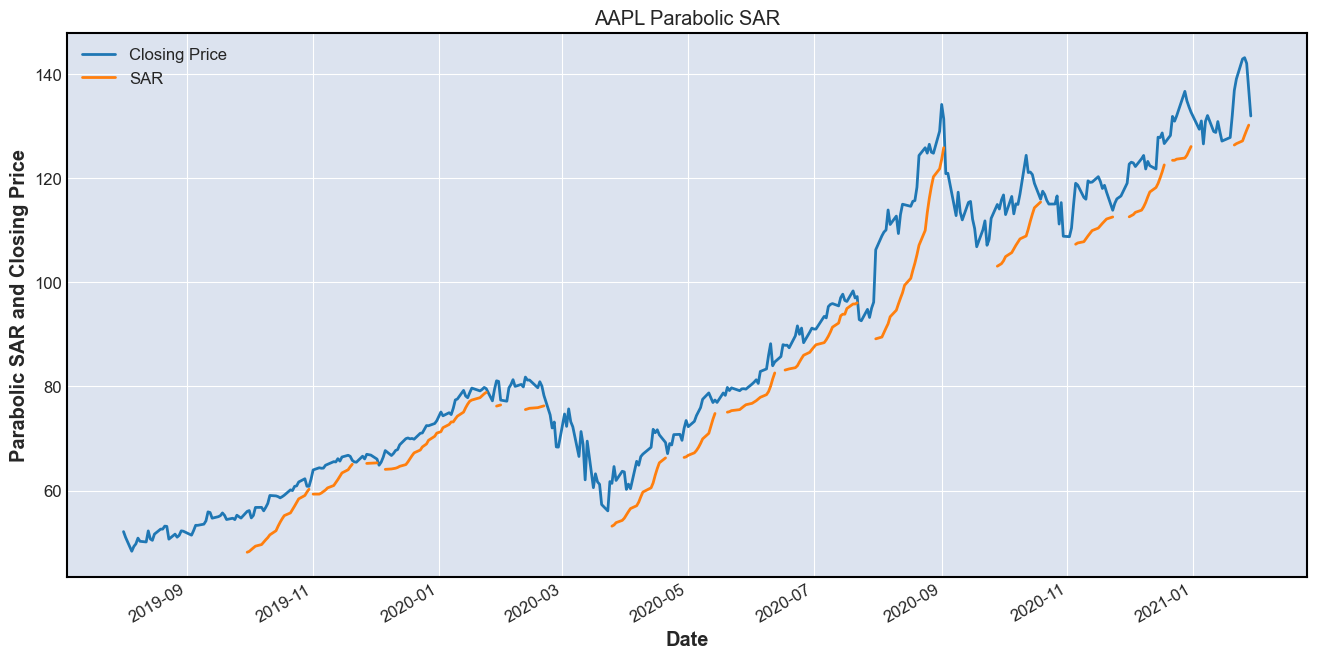

In [43]:
import pandas_ta as ta

start=datetime.datetime(2019,8,1)
end=datetime.datetime(2021,1,30)

aapl=yf.download('aapl', start, end)

psar=ta.psar(aapl.High, aapl.Low, aapl.Close, acceleration=0.02, maximum=0.2)

aapl=pd.concat([aapl,psar], axis=1)
print(aapl)

aapl['Close'].plot(label='Closing Price', figsize=(16,8))
aapl['PSARl_0.02_0.2'].plot(label='SAR')
_=plt.xlabel('Date')
_=plt.ylabel('Parabolic SAR and Closing Price')
_=plt.title('AAPL Parabolic SAR')
plt.legend()

### Fast and Slow Stochastic Oscillators

Stochastic oscillators are momentum indicators, such as the SMA seen before or the SAR. The difference considering the stochastic oscillators is that it can be divided into fast and slow, and that it is considered usually during a period of fourteen days. The formula for calculating the fast stochastic oscillator, referred to as %K, is as follows:

Equation 4: Fast Stochastic Oscillator Equation

% K = 100 ∗ Closing price − Low price of the 14 previous trading sessions / (Highest price in the last 14 day sessions − Low price of the 14 previous trading sessions

The interpretation regarding %K is that if the result is 80 then the price is 8% above the prices in the last 14 days. The days can change based on the intuition and knowledge of the trader and it is usual to see a five-day period.

The slow indicator creates a change by applying a three(3)-day moving average to fast calculation (%K). The result is that the slow stochastic oscillator (%D) creates a signal line that is useful to know when to buy and when to sell. The process for callating a fast oscillator is as follow:



In [60]:

start=datetime.datetime(2020,12,1)
end=datetime.datetime(2021,1,30)
aapl=yf.download('aapl', start, end)



[*********************100%%**********************]  1 of 1 completed


It is important to create an oscillator with fewer data points than the one’s used before. This is extremely useful for noticing the effect.

**– Fast stochastic oscillator**

In [70]:

fso_df = ta.momentum.stoch(aapl['High'], aapl['Low'], aapl['Close'], fastk=14, fastd=3, slow=False, append=True)
print(fso_df.head(10))



            STOCHk_14_3_3  STOCHd_14_3_3
Date                                    
2020-12-18            NaN            NaN
2020-12-21            NaN            NaN
2020-12-22      79.143333            NaN
2020-12-23      81.249492            NaN
2020-12-24      80.317913      80.236913
2020-12-28      84.971476      82.179627
2020-12-29      86.025970      83.771786
2020-12-30      82.663061      84.553502
2020-12-31      72.775822      80.488284
2021-01-04      61.660245      72.366376


In the equation before, the standard fourteen days were used for the %K and three days for the %D.

**– Slow stochastic oscillator**


In [69]:
sso_df = ta.stoch(aapl['High'], aapl['Low'], aapl['Close'], slowk=14, slowd=3, slow=True, append=True)
print(sso_df.head(10))


            STOCHk_14_3_3  STOCHd_14_3_3
Date                                    
2020-12-18            NaN            NaN
2020-12-21            NaN            NaN
2020-12-22      79.143333            NaN
2020-12-23      81.249492            NaN
2020-12-24      80.317913      80.236913
2020-12-28      84.971476      82.179627
2020-12-29      86.025970      83.771786
2020-12-30      82.663061      84.553502
2020-12-31      72.775822      80.488284
2021-01-04      61.660245      72.366376


– Plotting results (Figs. 31 and 32)

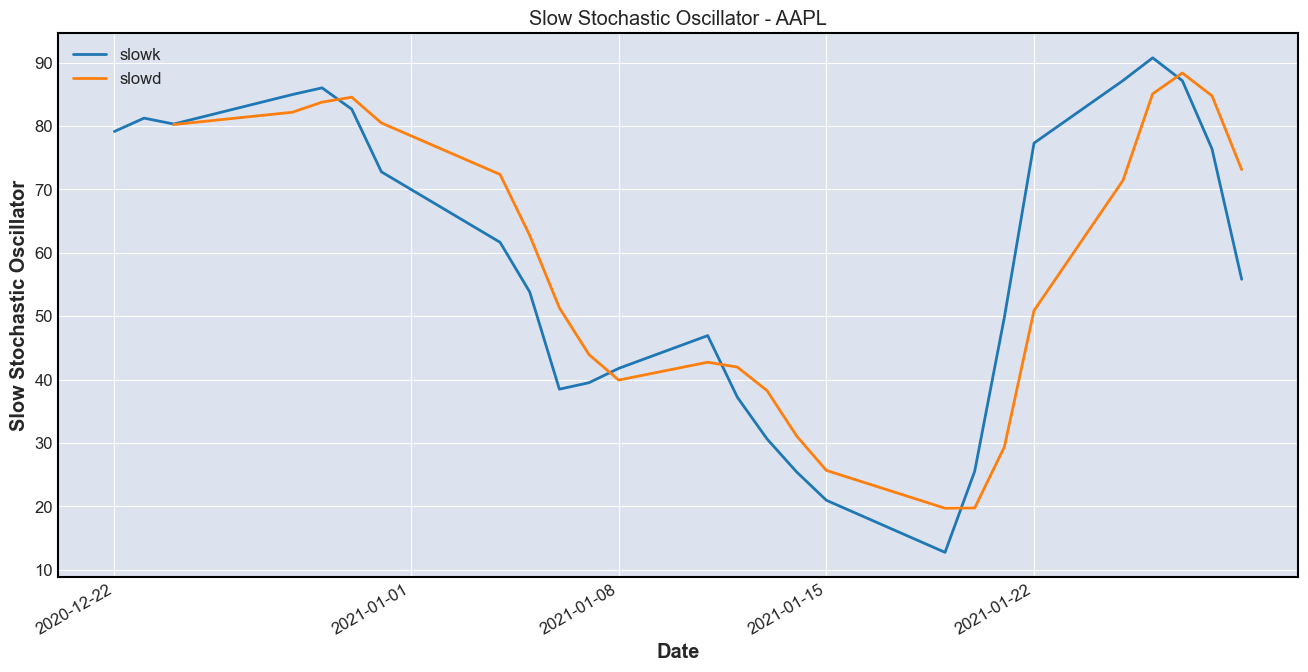

In [64]:
sso_df['STOCHk_14_3_3'].plot(label='slowk', figsize=(16,8))
sso_df['STOCHd_14_3_3'].plot(label='slowd')
_=plt.xlabel('Date')
_=plt.ylabel('Slow Stochastic Oscillator')
_=plt.title('Slow Stochastic Oscillator - AAPL')
plt.legend()




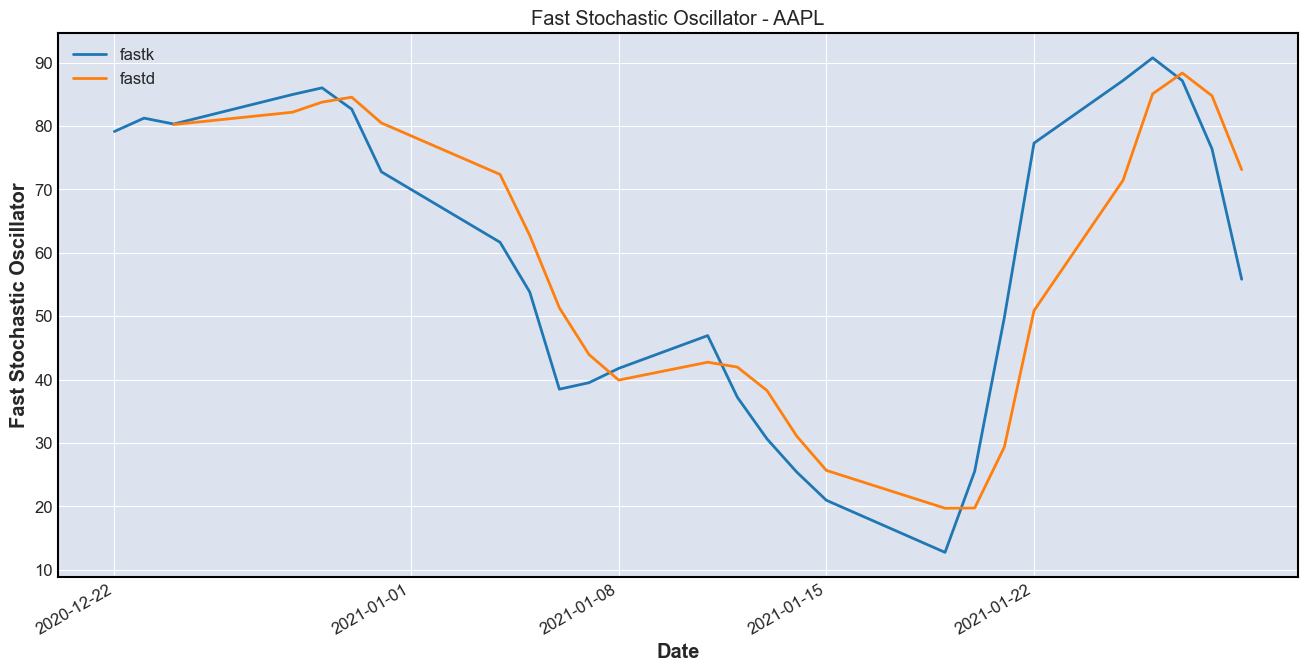

In [65]:
fso_df['STOCHk_14_3_3'].plot(label='fastk', figsize=(16,8))
fso_df['STOCHd_14_3_3'].plot(label='fastd')
_=plt.xlabel('Date')
_=plt.ylabel('Fast Stochastic Oscillator')
_=plt.title('Fast Stochastic Oscillator - AAPL')
plt.legend();
